Model Performance:
                               MAE  R2 Score
Random Forest             0.172437  0.583740
Linear Regression         0.249055  0.211059
Support Vector Regressor  0.263785  0.293913
Gradient Boosting         0.171657  0.616743


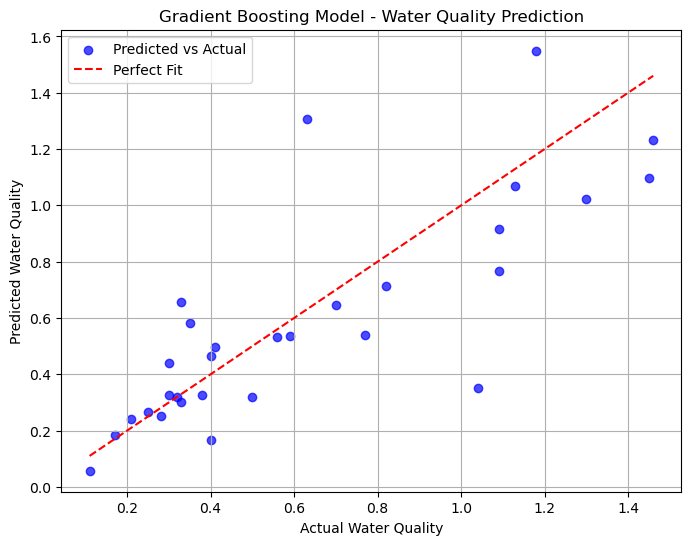

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score


file_paths = {
    "train_ammonia": "train_ammonia.csv",
    "train_BOD": "train_BOD.csv",
    "train_DOP": "train_DOP.csv",
    "train_phosphates": "train_phosphates.csv",
    "train_SS": "train_SS.csv",
    "test_ammonium": "test_ammonium.csv",
    "test_BOD": "test_BOD.csv",
    "test_DOP": "test_DOP.csv",
    "test_phosphates": "test_phosphates.csv",
    "test_SS": "test_SS.csv",
}

# Load datasets
datasets = {name: pd.read_csv(path) for name, path in file_paths.items()}

# Load datasets
datasets = {name: pd.read_csv(path) for name, path in file_paths.items()}

# List of datasets
train_datasets = ["train_ammonia", "train_BOD", "train_DOP", "train_phosphates", "train_SS"]
test_datasets = ["test_ammonium", "test_BOD", "test_DOP", "test_phosphates", "test_SS"]

# Combine all training and testing data
train_data = []
test_data = []

for train_file, test_file in zip(train_datasets, test_datasets):
    train_df = datasets[train_file].drop(columns=["Id"])  # Drop Id column
    test_df = datasets[test_file].drop(columns=["Id"])  # Drop Id column
    
    train_data.append(train_df)
    test_data.append(test_df)

# Merge training datasets on index
train_merged = pd.concat(train_data, axis=1)
test_merged = pd.concat(test_data, axis=1)

# Remove duplicate target columns (keeping the first occurrence)
train_merged = train_merged.loc[:, ~train_merged.columns.duplicated()]

# Define features and target
y = train_merged["target"]  # Assuming target column represents overall water quality
X = train_merged.drop(columns=["target"])

# Handle missing values by filling with column mean
X = X.apply(lambda col: col.fillna(col.mean()), axis=0)
test_merged = test_merged.apply(lambda col: col.fillna(col.mean()), axis=0)

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Models to compare
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression(),
    "Support Vector Regressor": SVR(),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    results[name] = {"MAE": mae, "R2 Score": r2}

# Convert results to DataFrame for easy comparison
results_df = pd.DataFrame(results).T
print("Model Performance:")
print(results_df)

# Get the best model (Gradient Boosting Regressor)
best_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_val)

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred, alpha=0.7, color="blue", label="Predicted vs Actual")
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color="red", linestyle="--", label="Perfect Fit")
plt.xlabel("Actual Water Quality")
plt.ylabel("Predicted Water Quality")
plt.title("Gradient Boosting Model - Water Quality Prediction")
plt.legend()
plt.grid(True)
plt.show()
